In [ ]:
import tkinter
from PIL import Image, ImageTk, ImageDraw

image_file ="1.png"

w = tkinter.Tk()

img = Image.open(image_file)
width, height = img.size
ca = tkinter.Canvas(w, width=width, height=height)
ca.pack()
photoimg = ImageTk.PhotoImage("RGB", img.size)
photoimg.paste(img)
ca.create_image(width//2,height//2, image=photoimg)
tkinter.mainloop()

In [ ]:
from tkinter import *
root = Tk()
frame = Frame(root, width=200, height=200)
def callback(event):
    print('當前位置為：',event.x, event.y)
frame.bind('<Button-1>',callback)
frame.pack()
mainloop()

In [ ]:
from tkinter import *
import math as m

root = Tk()
w = Canvas(root,width=200,height=100)
w.pack()
def paint(event):
    x1,y1 = (event.x-1),(event.y-1)
    x2,y2 = (event.x+1),(event.y+1)
    w.create_oval(x1,y1,x2,y2,fill="red")
w.bind("<B1 - Motion>",paint)
Label(root,text="按住滑鼠拖動").pack(side=BOTTOM)
mainloop()

In [ ]:
from tkinter import *
from PIL import Image, ImageTk

root = Tk()

images = []  # to hold the newly created image

def create_rectangle(x1, y1, x2, y2, **kwargs):
    if 'alpha' in kwargs:
        alpha = int(kwargs.pop('alpha') * 255)
        fill = kwargs.pop('fill')
        fill = root.winfo_rgb(fill) + (alpha,)
        image = Image.new('RGBA', (x2-x1, y2-y1), fill)
        images.append(ImageTk.PhotoImage(image))
        canvas.create_image(x1, y1, image=images[-1], anchor='nw')
    canvas.create_rectangle(x1, y1, x2, y2, **kwargs)

canvas = Canvas(width=300, height=200)
canvas.pack()

create_rectangle(10, 10, 200, 100, fill='blue')
create_rectangle(50, 50, 250, 150, fill='green', alpha=.5)
create_rectangle(80, 80, 150, 120, fill='#800000', alpha=.8)

root.mainloop()

In [ ]:
from tkinter import Canvas, Tk, mainloop
from PIL import Image, ImageTk, ImageDraw

root = Tk()
img = Image.open("1.png")
width, height = img.size

ca = Canvas(root, width=width, height=height)
ca.pack()
photoimg = ImageTk.PhotoImage("RGB", img.size)
photoimg.paste(img)
ca.create_image(width//2,height//2, image=photoimg)

loc = []

def callback1(event):
    print('左鍵當前位置為：',event.x, event.y)
    x1,y1 = (event.x-2),(event.y-2)
    x2,y2 = (event.x+2),(event.y+2)
    ca.create_rectangle(x1,y1,x2,y2,fill="red")
    loc.append((event.x, event.y))
    
def callback2(event):
    print('右鍵當前位置為：',event.x, event.y)
    x1,y1 = (event.x-2),(event.y-2)
    x2,y2 = (event.x+2),(event.y+2)
    ca.create_rectangle(x1,y1,x2,y2,fill="red")
    ca.create_rectangle(loc[0][0],loc[0][1], event.x,event.y, fill="yellow")
    loc.clear()
    
ca.bind('<Button-1>',callback1)
ca.bind('<Button-3>',callback2)
ca.pack()
mainloop()

In [ ]:
from tkinter import Canvas, Tk, mainloop
from PIL import Image, ImageTk, ImageDraw
import time

root = Tk()
img = Image.open("Image/根尖X光影像.jpg")
width, height = img.size

ca = Canvas(root, width=width, height=height)
ca.pack()
photoimg = ImageTk.PhotoImage("RGB", img.size)
photoimg.paste(img)
ca.create_image(width//2,height//2, image=photoimg)

loc = []
images = []

def create_rectangle(x1, y1, x2, y2, **kwargs):
    if 'alpha' in kwargs:
        alpha = int(kwargs.pop('alpha') * 255)
        fill = kwargs.pop('fill')
        fill = root.winfo_rgb(fill) + (alpha,)
        image = Image.new('RGBA', (x2-x1, y2-y1), fill)
        images.append(ImageTk.PhotoImage(image))
        ca.create_image(x1, y1, image=images[-1], anchor='nw')
    ca.create_rectangle(x1, y1, x2, y2, **kwargs)

def callback1(event):
    print('左鍵當前位置為：',event.x, event.y)
    x1,y1 = (event.x-2),(event.y-2)
    x2,y2 = (event.x+2),(event.y+2)
    create_rectangle(x1,y1,x2,y2,fill="red")
    loc.append((event.x, event.y))
    
def callback2(event):
    print('右鍵當前位置為：',event.x, event.y)
    x1,y1 = (event.x-2),(event.y-2)
    x2,y2 = (event.x+2),(event.y+2)
    create_rectangle(x1,y1,x2,y2,fill="red")
    create_rectangle(loc[0][0],loc[0][1], event.x, event.y, fill="yellow", alpha=.5)
    
    img_copy = img.copy()
    img_crop = img_copy.crop((loc[0][0], loc[0][1], event.x, event.y))
    time_str = time.strftime("%Y%m%d_%H%M%S", time.localtime()) #現在時間格式化成20160320 114539形式
    img_crop.save("Teeth"+ time_str +".jpg")
    
    loc.clear()
    
ca.bind('<Button-1>',callback1)
ca.bind('<Button-3>',callback2)
ca.pack()
mainloop()

(828, 499)


C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.


(828, 499)


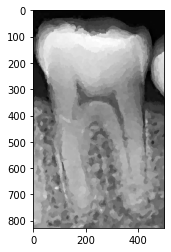

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


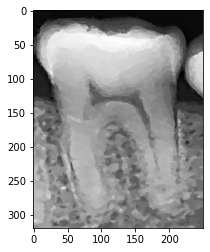

In [2]:
# coding: utf-8

import sys
sys.setrecursionlimit(100000000)

import cv2
from scipy import misc
from skimage.filters import unsharp_mask
from cv2 import createCLAHE
from skimage import segmentation
from skimage import color
import tkinter as tk 
from PIL import Image, ImageTk
from tkinter import filedialog
from tkinter.font import Font  
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

import imageio

cnn = load_model('cnn_NP_vs_P.h5', compile = False)

feature_name = ['Non-Periodontitis', 'Periodontitis'] 
clahe= createCLAHE(clipLimit=3.0)


def open_file():
    
    filename = filedialog.askopenfilename(title='Select file', filetypes=[("all files","*.*"),("bmp files","*.bmp"),("png files","*.png"),("jpeg files","*.jpg")])
    
    img = Image.open(filename).resize((250,320))
    imgtk = ImageTk.PhotoImage(img)
    label_img_1.config(image = imgtk)
    label_img_1.image = imgtk
    
    img = Image.open(filename)
    npimg = np.asarray(img, dtype="uint8")
    print(npimg.shape)
    clahe_train = clahe.apply(npimg)
    X_unsharp_train=unsharp_mask(clahe_train,radius=3,amount=2)
    seg_train=segmentation.slic(X_unsharp_train,n_segments=4000,compactness=0.1, start_label=0)
    image_avg_train=color.label2rgb(seg_train,X_unsharp_train , kind='avg')
        
    print(image_avg_train.shape)
    plt.imshow(image_avg_train, cmap='gray')
    plt.show()
    
    #misc.imsave("C_U_S.bmp",image_avg_train)
    #cv2.imwrite('C_U_S.bmp', image_avg_train)
    imageio.imwrite('C_U_S.bmp', image_avg_train)
    
    img = Image.open("C_U_S.bmp").resize((250,320))
    
    plt.imshow(img, cmap='gray')
    plt.show()
    
    imgtk = ImageTk.PhotoImage(img)
    label_img_2.config(image = imgtk)
    label_img_2.image = imgtk
   
    img_predict = Image.open("C_U_S.bmp").resize((100,100))
    npimg = np.asarray(img_predict, dtype="uint8")
    img_predict_nor = npimg.astype('float32')/255
    predict = cnn.predict(np.array([img_predict_nor.reshape((100,100,1))]))
    predictions = [np.argmax(one_hot)for one_hot in predict]
    label_predict.config(text = feature_name[predictions[0]])
    
app = tk.Tk()
app.title('Body Mass Index')
app.geometry('720x600')

title_label_Font = Font(family="Times", size=28, underline=1)
subtitle_label_Font_1 = Font(family="Times", size=22)
botton_Font = Font(family="Times", size=20)

frame_title = tk.Frame(app)
frame_title.grid(column=0, row=0, ipadx=3, pady=3)

frame_image = tk.Frame(app)
frame_image.grid(column=0, row=1, ipadx=3, pady=3)

frame_input = tk.Frame(app)
frame_input.grid(column=0, row=2, ipadx=3, pady=3)

label_Title = tk.Label(frame_title, text="Non-Periodontitis & Periodontitis Classification", font=title_label_Font)
label_Title.grid(column=0, row=0, ipadx=15, pady=0)

label_Subtitle = tk.Label(frame_title, text="※ Please enter the correct image.", font=subtitle_label_Font_1)
label_Subtitle.grid(column=0, row=1, ipadx=10, pady=5)

img_path_1 = "p-img_1.png"
img_1 = Image.open(img_path_1).resize((250,320))
imgtk_1 = ImageTk.PhotoImage(img_1)
label_img_1 = tk.Label(frame_image, image=imgtk_1)
label_img_1.grid(column=0, row=0, ipadx=40, pady=0)

img_path_2 = "p-img_2.png"
img_2 = Image.open(img_path_2).resize((250,320))
imgtk_2 = ImageTk.PhotoImage(img_2)
label_img_2 = tk.Label(frame_image, image=imgtk_2)
label_img_2.grid(column=1, row=0, ipadx=40, pady=0)

predict_name = "Prediction : No file"
label_predict = tk.Label(frame_input, text = predict_name, font=subtitle_label_Font_1)
label_predict.grid(column=0, row=0, pady=0)

openButton = tk.Button(frame_input, text = 'Open file', command = open_file, font=botton_Font )
openButton.grid(column=0, row=1, pady=10)

app.mainloop()